In [63]:
# Import necessary libraries
import numpy as np
import os
from pathlib import Path
from matplotlib import pyplot as plt

# Fixed Rejection Level Averaging

In [64]:
def fixed_average(epochs):
    
    threshold = 6 #uV
    valid_epochs = []

    for epoch in epochs:
        rms_amplitude = np.sqrt(np.mean(epoch ** 2))

        # Check if the RMS amplitude is less than the threshold
        if rms_amplitude < threshold:
            # Add the epoch to the list of valid epochs
            valid_epochs.append(epoch)
    
    # Calculate the average evoked potential
    average_fixed_evoked_potential = np.mean(valid_epochs, axis=0)
    return average_fixed_evoked_potential
    

# Weighted Averaging

In [65]:
def weighted_average(epochs):
    
    avg_epoch = np.zeros(np.shape(epochs)[1])
    shi_vector = []

    for epoch in epochs:
        variance = np.var(epoch)
        shi_vector.append(1/variance)
            
    for epoch in epochs:
        variance = np.var(epoch)
        weight = (1/variance)/sum(shi_vector)
        avg_epoch = avg_epoch + weight*epoch

    #print(avg_epoch)
    return avg_epoch

### SNR code

In [66]:
def snr(avg_epoch):
    # Calculate the mean and standard deviation of the samples
    mean = np.mean(avg_epoch)
    std = np.std(avg_epoch)
    
    # Calculate the SNR
    snr = mean / (std)
    return snr

# Sorted averaging

In [67]:

def sorting_averaging(epochs):
  
    sorted_epoch = {}
    for epoch in epochs:
        rms = np.sqrt(np.mean(np.array(epoch**2)))
        sorted_epoch[rms] = epoch
        
    sorted_keys = sorted(sorted_epoch, key=lambda x: x)
    sum_sorted_epoch = np.zeros(np.shape(epochs)[1])
    avg_sorted_epoch = []
    max_snr = float("-inf")
    best_key = 0
    
    for i, rms in enumerate(sorted_keys):
        sum_sorted_epoch = sum_sorted_epoch + sorted_epoch[rms]
        avg_sorted_epoch = sum_sorted_epoch / (i+1)
        snr_avg_epoch = snr(avg_sorted_epoch)
        if(snr_avg_epoch > max_snr):
            max_snr = snr_avg_epoch
            best_key = rms
    
    sum_sorted_epoch = np.zeros(np.shape(epochs)[1])
    avg_sorted_epoch = []
    for i, rms in enumerate(sorted_keys):
        sum_sorted_epoch = sum_sorted_epoch + sorted_epoch[rms]
        avg_sorted_epoch = sum_sorted_epoch / (i+1)
        if(rms == best_key):
            break
    return avg_sorted_epoch


# RUNS and Prints

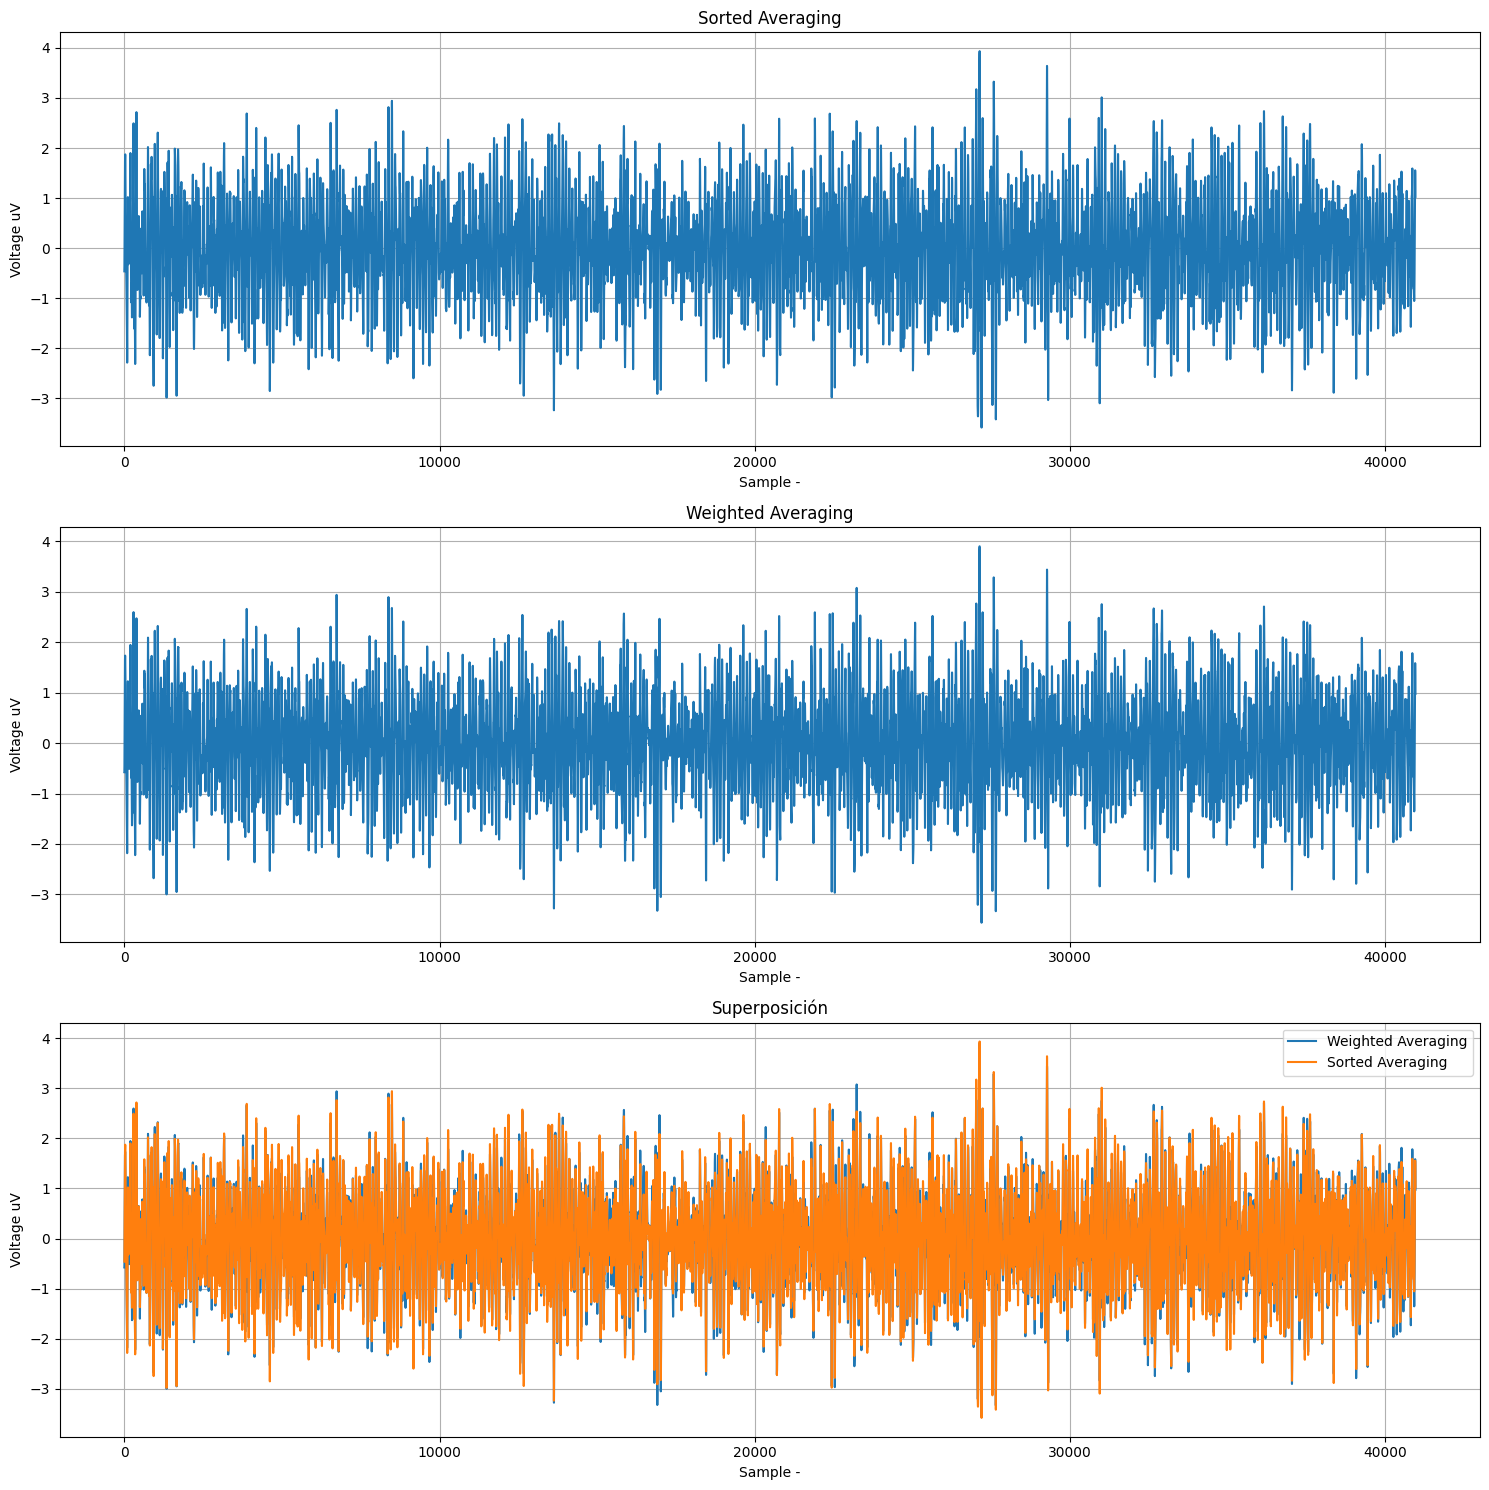

In [68]:
loadPath = os.path.abspath('')+'\data'
archivos = os.listdir(loadPath)

epochs = []
for i, arch in enumerate(archivos):
    data = np.loadtxt(loadPath+'/'+arch)
    
    epoch = data[:,0]
    epochs.append(np.array(epoch))

sorting_avg_evoked_potential= sorting_averaging(epochs)
weighted_avg__evoked_potential= weighted_average(epochs)
#average_fixed_evoked_potential= fixed_average(epochs)

fig, axs = plt.subplots(3,1, figsize=(15, 15))

axs[0].plot(sorting_avg_evoked_potential)
axs[0].set_title("Sorted Averaging")
axs[0].set(ylabel='Voltage uV', xlabel='Sample -')
axs[0].grid()

axs[1].plot(weighted_avg__evoked_potential)
axs[1].set_title("Weighted Averaging")
axs[1].set(ylabel='Voltage uV', xlabel='Sample -')
axs[1].grid()

""" 
axs[2].plot(simple_average)
axs[2].set_title("Average")
axs[2].set(ylabel='Voltage uV', xlabel='Sample -')
axs[2].grid() 
"""

axs[2].set_title("Superposición")
axs[2].plot(weighted_avg__evoked_potential, label="Weighted Averaging")
axs[2].plot(sorting_avg_evoked_potential, label="Sorted Averaging")
#axs[3].plot(average_fixed_evoked_potential, label="Fixed Rejection Level")
axs[2].set(ylabel='Voltage uV', xlabel='Sample -')
axs[2].grid()
axs[2].legend()

plt.tight_layout()

plt.show()  

In [69]:
print(snr(sorting_avg_evoked_potential))
print(snr(weighted_avg__evoked_potential))
#print(snr(average_fixed_evoked_potential))


0.0006252900224912404
0.0003557568651757391
